In [1]:
import dotspy as ds
print(ds.__file__)

/Users/chunweiy/project/dotspy/dotspy/__init__.py


# Basic graph

## Graph as singlegon

In [2]:
g = ds.Graph(label="quickstart for dotspy", graph_type="digraph")

Override the global graph directly without using `with` statement and annoying indentation.

In [3]:
ds.set_graph(g) # reset global Graph

In [4]:
node0 = ds.Node(labe="node0", color="red")

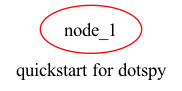

In [5]:
g

## Nested Graph powered by `with`-statement

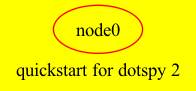

In [6]:
with ds.Graph(label="quickstart for dotspy 2", bgcolor=ds.YELLOW) as g:
    node0 = ds.Node(label="node0", color="red")
g

In [7]:
with ds.Graph(label="quickstart for dotspy 3", bgcolor=ds.YELLOW) as g:
    with ds.Subgraph(label="subgraph 0", bgcolor=ds.BLUE, fontcolor=ds.WHITE):
        node0 = ds.Node(label="node0", bgcolor=ds.WHITE, fontcolor=ds.BLACK, style="filled,rounded")
        with ds.Subgraph(label="subgraph 1", bgcolor=ds.GREEN):
            node1 = ds.Node(label="node1", color=ds.ORANGE, style="filled,rounded", shape="box")

print(g.to_dot())

digraph "G" {
  bgcolor="yellow";
  label="quickstart for dotspy 3";
  rankdir="TB";
  subgraph "cluster_subgraph_1e1b710555484416bbfd1d91c1867e72" {
    fontcolor="white";
    bgcolor="blue";
    label="subgraph 0";
    "node_3" [fontcolor="black", bgcolor="white", label="node0", style="filled,rounded"];
    subgraph "cluster_subgraph_f52a9af087de4851a18705b8ffc36ae8" {
      bgcolor="green";
      label="subgraph 1";
      "node_4" [color="orange", label="node1", shape="box", style="filled,rounded"];
    }
  }
}


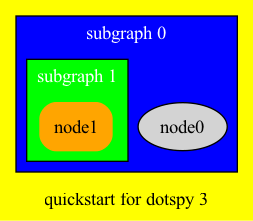

In [8]:
g

# CSS like styling
You can define your own style for graphs, nodes, and edges.

## Define Graph, Node, Edge Style with `NodeStyle`, `EdgeStyle`, `GraphStyle`

digraph "G" {
  label="quickstart for dotspy 4";
  rankdir="TB";
  "node_5" [penwidth="2.0", color="blue", fillcolor="red", label="node0", shape="box", style="filled,rounded"];
  "node_6" [penwidth="2.0", color="orange", fillcolor="red", label="node1", shape="box", style="filled,rounded"];
  "node_5" -> "node_6";
}


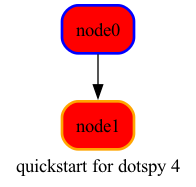

In [9]:
from dotspy import NodeStyle, EdgeStyle, GraphStyle

node_style = NodeStyle(
    fillcolor="red",
    # fill_opacity=0.5,
    color="blue",
    penwidth=2,
    shape="box",
    style="filled,rounded",
)

g = ds.Graph(label="quickstart for dotspy 4") 
with g:
    node0 = ds.Node(label="node0", styles=node_style)
    # style with customization
    node1 = ds.Node(label="node1", styles=node_style, color=ds.ORANGE)
    node0 >> node1

print(g.to_dot())
g

## Chained Style like CSS
You can chain styles like CSS, like assigning multiple styles to a node or edge, the styles will be merged.

digraph "G" {
  label="Chained Style";
  rankdir="TB";
  "node_7" [label="rounded node", shape="box", style="filled,rounded"];
  "node_8" [penwidth="2.0", color="blue", label="beautify node"];
  "node_9" [penwidth="2.0", color="blue", label="chained node", shape="box", style="filled,rounded"];
}


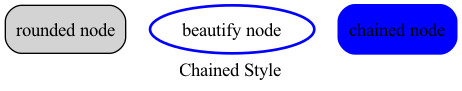

In [10]:
rounded_node_style = NodeStyle(shape="box", style="filled,rounded")
beautify_node_style = NodeStyle(color="blue", penwidth=2)

with ds.Graph(label="Chained Style") as g:
    node0 = ds.Node(label="rounded node", styles=rounded_node_style)
    node1 = ds.Node(label="beautify node", styles=beautify_node_style)
    node2 = ds.Node(label="chained node", styles=[rounded_node_style, beautify_node_style])

print(g.to_dot())
g


## HTML Node

dotspy supports HTML Node, which is a node that can be rendered as HTML. There are two ways to create an HTML Node:
1. Raw HTML mode: Provide raw DOT-compatible HTML directly
2. Markdown mode: Provide markdown text that gets converted to DOT HTML

### Markdown Mode

digraph "G" {
  label="HTML Node";
  rankdir="TB";
  "node_10" [label=<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0"><TR><TD ALIGN="LEFT"><B>Bold</B> and <I>italic</I> text</TD></TR></TABLE>>];
  "node_11" [label=<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0"><TR><TD ALIGN="LEFT"><S>Strikethrough</S></TD></TR></TABLE>>];
  "node_12" [label=<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0"><TR><TD ALIGN="LEFT"><FONT POINT-SIZE="20"><B>A Table</B></FONT></TD></TR><TR><TD><TABLE BORDER="1" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4"><TR><TD><B>Header 1</B></TD><TD><B>Header 2</B></TD></TR><TR><TD>Cell 1</TD><TD>Cell 2</TD></TR></TABLE></TD></TR></TABLE>>];
}


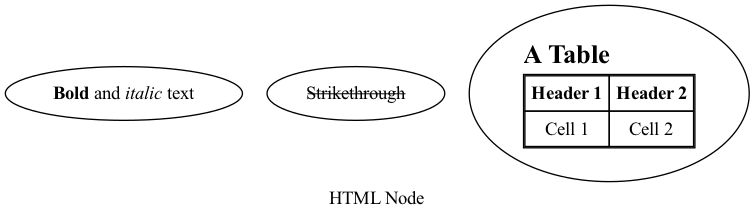

In [11]:
from dotspy import HTMLNode

with ds.Graph(label="HTML Node") as g:
    node1 = HTMLNode(markdown="**Bold** and *italic* text")
    node2 = HTMLNode(markdown="~~Strikethrough~~")
    node3 = HTMLNode(markdown="""
# A Table
| Header 1 | Header 2 |
|----------|----------|
| Cell 1   | Cell 2   |
""")

print(g.to_dot())
g


### Raw HTML Mode
In this mode, you can provide raw DOT-compatible HTML directly.

digraph "G" {
  label="Raw HTML Node";
  rankdir="TB";
  "node_14" [label=<<B>Bold</B> and <I>italic</I>>];
  "node_15" [label=<<FONT POINT-SIZE="16" COLOR="red">Large Red</FONT>>];
}


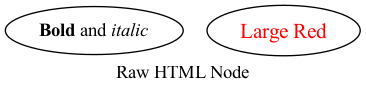

In [13]:
with ds.Graph(label="Raw HTML Node") as g:
    node1 = HTMLNode(html="<B>Bold</B> and <I>italic</I>")
    node2 = HTMLNode(html="<FONT POINT-SIZE=\"16\" COLOR=\"red\">Large Red</FONT>")

print(g.to_dot())
g

